In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Circle
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

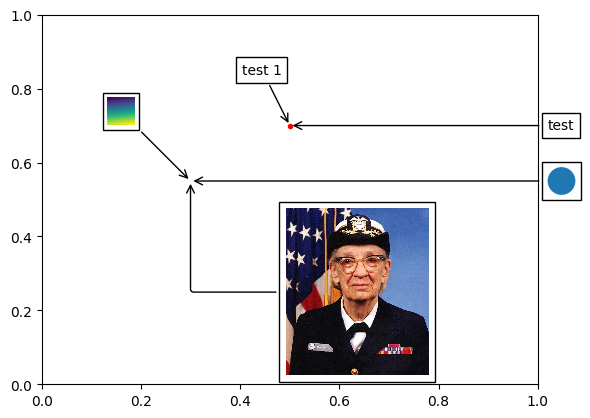

In [2]:
fig, ax = plt.subplots()

# define a 1st position to annotate (display it with a marker)
xy = (0.5, 0.7)
ax.plot(xy[0], xy[1], ".r")

# annotate the 1st position with a text box ('test 1')
offsetbox = TextArea("test 1")
ab = AnnotationBbox(
    offsetbox, xy, xybox=(-20, 40), xycoords="data",
    boxcoords="offset points", arrowprops={"arrowstyle": "->"},
)
ax.add_artist(ab)

# annotate the 1st position with another text box ('test')
offsetbox = TextArea("test")
ab = AnnotationBbox(
    offsetbox, xy, xybox=(1.02, xy[1]), xycoords="data", box_alignment=(0, 0.5),
    boxcoords=("axes fraction", "data"), arrowprops={"arrowstyle": "->"},
)
ax.add_artist(ab)

# define a 2nd position to annotate (don't display with a marker this time)
xy = [0.3, 0.55]

# annotate the 2nd position with a circle patch
da = DrawingArea(20, 20, 0, 0)
p = Circle((10, 10), 10)
da.add_artist(p)
ab = AnnotationBbox(
    da, xy, xybox=(1.02, xy[1]), xycoords="data", box_alignment=(0, 0.5),
    boxcoords=("axes fraction", "data"), arrowprops={"arrowstyle": "->"},
)
ax.add_artist(ab)

# annotate the 2nd position with an image (a generated array of pixels)
arr = np.arange(100).reshape((10, 10))
im = OffsetImage(arr, zoom=2)
im.image.axes = ax
ab = AnnotationBbox(
    im, xy, xybox=(-50, 50), xycoords="data", pad=0.3,
    boxcoords="offset points", arrowprops={"arrowstyle": "->"},
)
ax.add_artist(ab)

# annotate the 2nd position with another image (a Grace Hopper portrait)
with get_sample_data("grace_hopper.jpg") as file:
    arr_img = plt.imread(file)

imagebox = OffsetImage(arr_img, zoom=0.2)
imagebox.image.axes = ax
ab = AnnotationBbox(
    imagebox, xy, xybox=(120, -80), xycoords="data", pad=0.5, boxcoords="offset points",
    arrowprops={"arrowstyle": "->", "connectionstyle": "angle,angleA=0,angleB=90,rad=3"},
)
ax.add_artist(ab)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()